In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


print("Training data shape", train_images.shape)
print("Test data shape", test_images.shape)

In [ ]:
plt.figure(figsize=(8,8))

for i in range(9):
  plt.subplot(3,3, i + 1)
  plt.imshow(train_images[i], cmap='gray')
  plt.title(f"label: {train_labels[i]}")
  plt.axis('off')


plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

print("After reshaping:")
print("Train images shape:", train_images.shape)
print("Test images shape: ", test_images.shape)

In [20]:
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64, activation ='relu'),

    layers.Dense(10, activation='softmax')

])

In [21]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_images, train_labels,
    epochs = 5,
    validation_data = (test_images, test_labels)
)

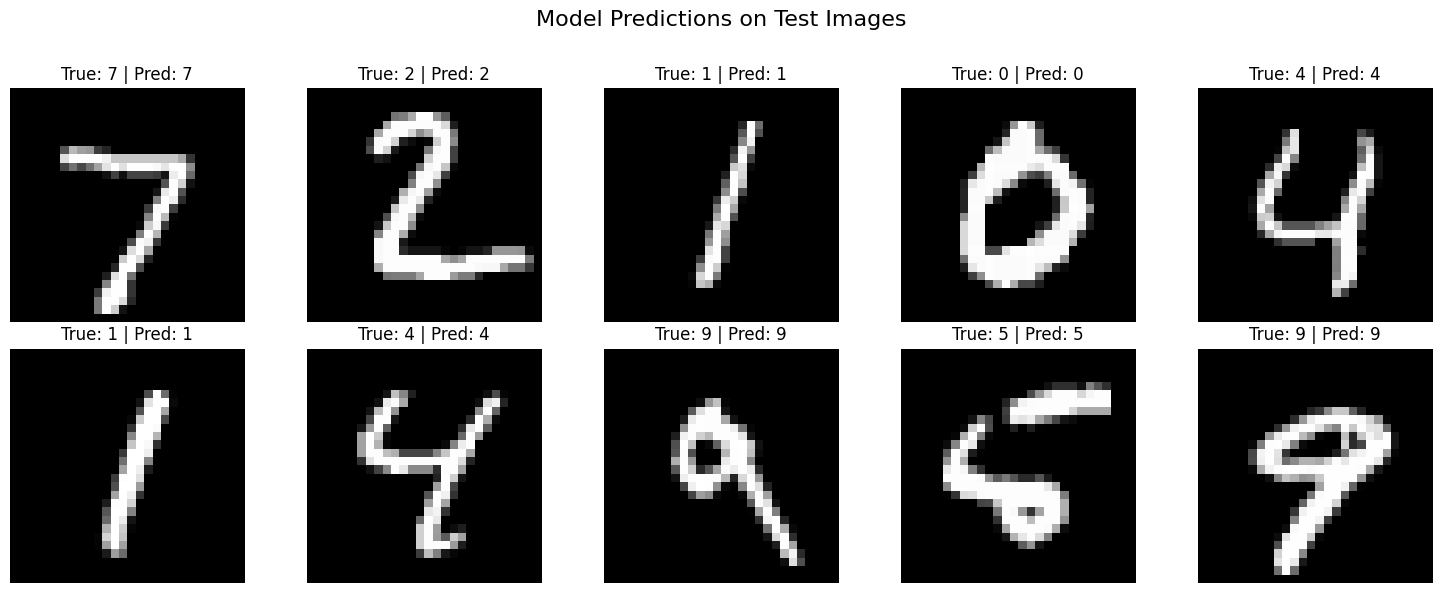

In [32]:
import matplotlib.pyplot as plt
import numpy as np


num_images = 10
start_index = 0

plt.figure(figsize=(15, 6))

for i in range(num_images):
    index = start_index + i
    image = test_images[index]
    true_label = test_labels[index]


    image_input = np.expand_dims(image, axis=0)
    predicted_probs = model.predict(image_input, verbose=0)
    predicted_label = np.argmax(predicted_probs)


    plt.subplot(2, 5, i + 1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_label} | Pred: {predicted_label}")
    plt.axis('off')

plt.suptitle("Model Predictions on Test Images", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
